In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [4]:
vg = pd.read_csv('vgsales.csv')
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
vg = vg[(vg.Year < 2017)]  ## Only 4 rows of information is available for years 2017 and above

In [6]:
rows_to_drop = vg[vg.Year > 2016].index
vg=vg.drop(rows_to_drop)
vg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16323 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16323 non-null  int64  
 1   Name          16323 non-null  object 
 2   Platform      16323 non-null  object 
 3   Year          16323 non-null  float64
 4   Genre         16323 non-null  object 
 5   Publisher     16287 non-null  object 
 6   NA_Sales      16323 non-null  float64
 7   EU_Sales      16323 non-null  float64
 8   JP_Sales      16323 non-null  float64
 9   Other_Sales   16323 non-null  float64
 10  Global_Sales  16323 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [7]:
vg.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [8]:
no_of_games = vg.Genre.value_counts()
total_games = vg.Genre.value_counts().sum()
no_of_games_percent = []
for i in list(no_of_games):
    no_of_games_percent.append(round(i*100/total_games,2))
no_of_games_percent
no_of_games

Action          3252
Sports          2304
Misc            1710
Role-Playing    1469
Shooter         1282
Adventure       1276
Racing          1226
Platform         876
Simulation       850
Fighting         836
Strategy         671
Puzzle           571
Name: Genre, dtype: int64

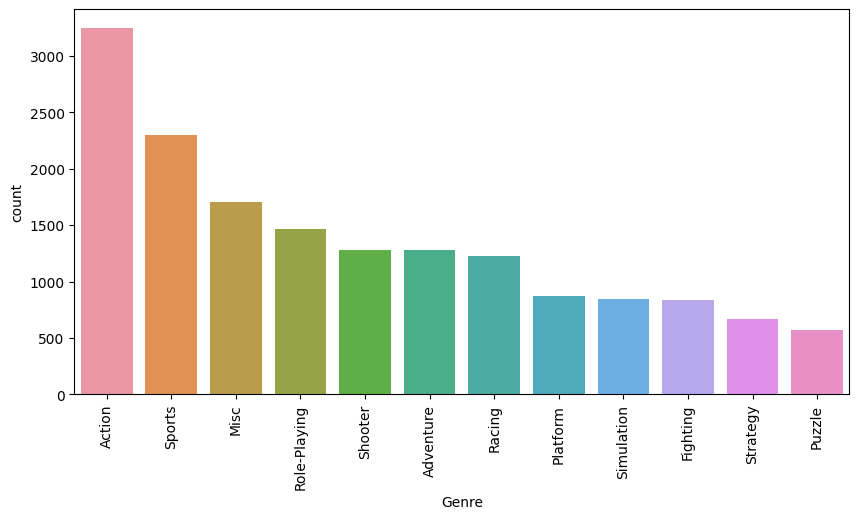

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Genre', data = vg, order = vg.Genre.value_counts().index)
plt.xticks(rotation = 90)
plt.show()

###### **Observation** : Most number of video games are developed in Action (3252) and Sports (2304) genres out of 16323 total games.

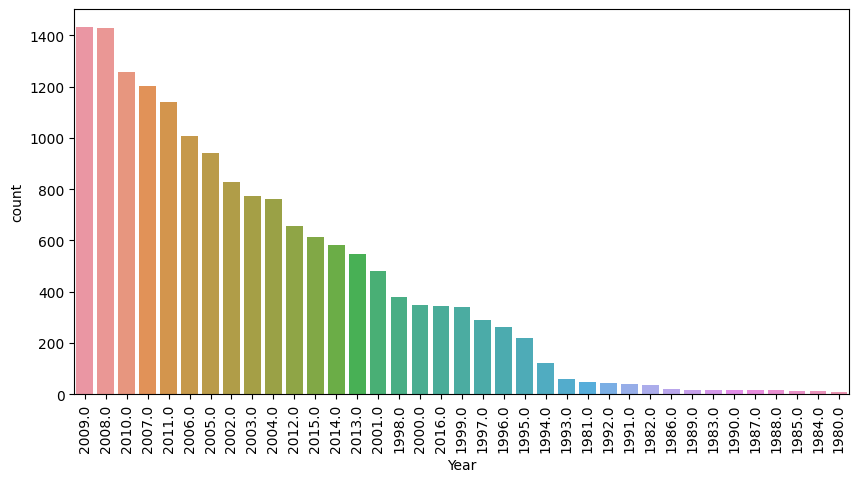

Year
2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
Name: Name, dtype: int64

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Year', data = vg, order = vg.groupby(by=['Year'])['Name'].count().sort_values(ascending = False).index)
plt.xticks(rotation = 90)
plt.show()
vg.groupby(by=['Year'])['Name'].count().sort_values(ascending = False).iloc[:10]

###### **Observation** : Most number of games are developed in the year 2009 followed by 2008.

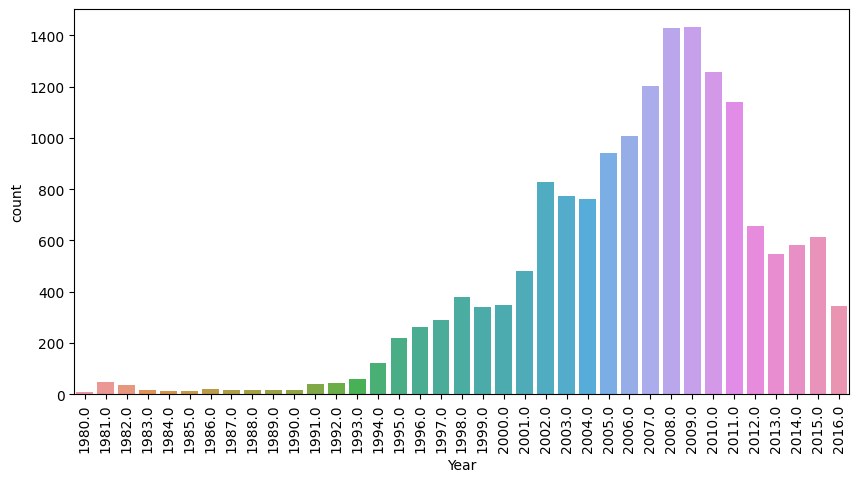

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Year', data = vg)
plt.xticks(rotation = 90)
plt.show()

###### **Observation** : Most games are developed in the decade of 2001 - 2011

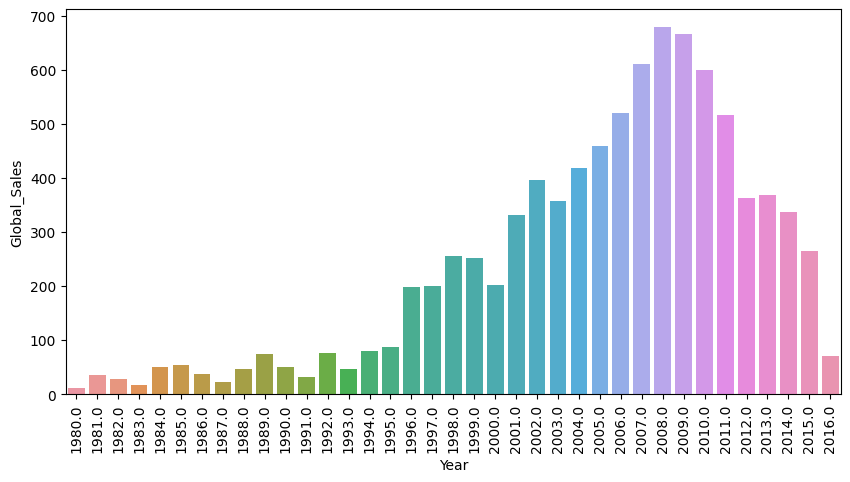

Year
2008.0    678.90
2009.0    667.30
2007.0    611.13
2010.0    600.45
2006.0    521.04
2011.0    515.99
2005.0    459.94
2004.0    419.31
2002.0    395.52
2013.0    368.11
Name: Global_Sales, dtype: float64

In [15]:
vg_year = vg.groupby(by = ['Year'])['Global_Sales'].sum()
vg_year = vg_year.reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x = 'Year', y = 'Global_Sales', data = vg_year)
plt.xticks(rotation = 90)
plt.show()
vg.groupby(by = ['Year'])['Global_Sales'].sum().sort_values(ascending=False).iloc[:10]

In [16]:
## The number of games developed in 2011 is more than that of 2006. However, the total sales in 2006 is more than that of 2011.

In [17]:
year_max_df = vg.groupby(['Year','Genre']).size().reset_index(name='count')
# print(year_max_df)
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
# year_max_idx
year_max_genre = year_max_df[year_max_idx].reset_index(drop = True)
year_max_genre

,Year,Genre,count
0,1980.0,Misc,4
1,1981.0,Action,25
2,1982.0,Action,18
3,1983.0,Action,7
4,1984.0,Puzzle,3
5,1984.0,Racing,3
6,1984.0,Shooter,3
7,1985.0,Platform,4
8,1985.0,Puzzle,4
9,1986.0,Action,6


In [18]:
year_max_genre['Genre'] = year_max_genre.groupby(by = ['Year'])['Genre'].transform(lambda x: ','.join(x))
year_max_genre.drop_duplicates(inplace=True)
year_max_genre

,Year,Genre,count
0,1980.0,Misc,4
1,1981.0,Action,25
2,1982.0,Action,18
3,1983.0,Action,7
4,1984.0,"Puzzle,Racing,Shooter",3
7,1985.0,"Platform,Puzzle",4
9,1986.0,"Action,Platform",6
11,1987.0,Sports,4
12,1988.0,Platform,4
13,1989.0,Puzzle,5


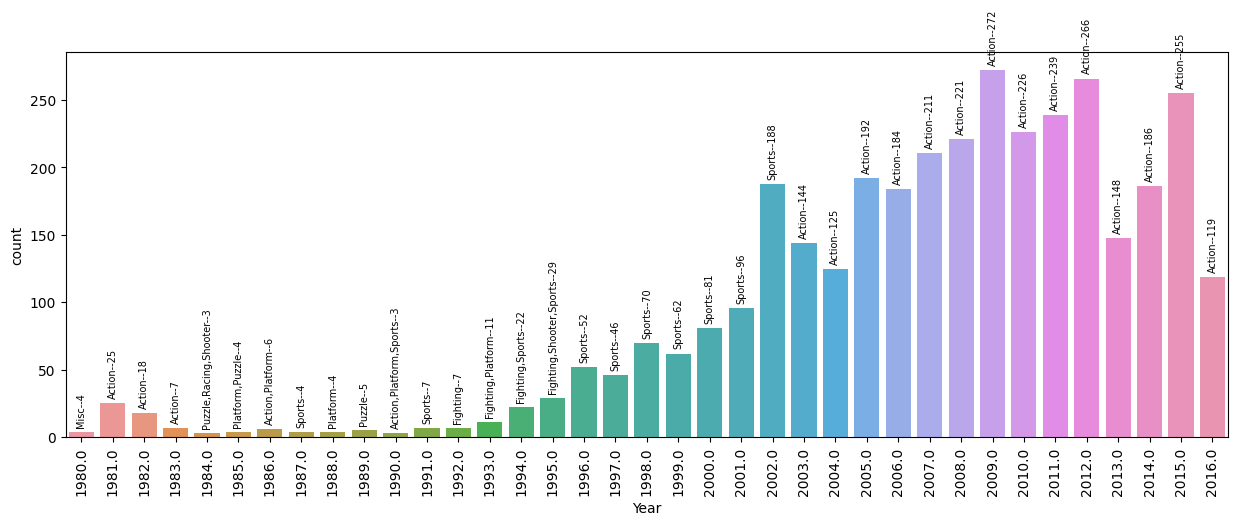

In [19]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x = 'Year', y = 'count', data = year_max_genre)
index = 0
for value in year_max_genre['count'].values:
    ax.text(index, value+5, str(year_max_genre['Genre'].iloc[index] + '--' + str(value)), color = '#000', size = 7, rotation = 90, ha = 'center')
    index += 1

plt.xticks(rotation = 90)
#plt.grid()
plt.show()

In [20]:
## Action genre games are the most games released in years 2009 (272 games) and 2012 (266 games)

In [21]:
year_max_sale_df = vg.groupby(['Year','Genre'])['Global_Sales'].sum().reset_index()
# print(year_max_sale_df)
year_max_sale_idx = year_max_sale_df.groupby(['Year'])['Global_Sales'].transform(max) == year_max_sale_df['Global_Sales']
# year_max_sale_idx
year_max_sale = year_max_sale_df[year_max_sale_idx].reset_index(drop = True)
year_max_sale

,Year,Genre,Global_Sales
0,1980.0,Shooter,7.07
1,1981.0,Action,14.84
2,1982.0,Puzzle,10.03
3,1983.0,Platform,6.93
4,1984.0,Shooter,31.10
5,1985.0,Platform,43.17
6,1986.0,Action,13.74
7,1987.0,Fighting,5.42
8,1988.0,Platform,27.73
9,1989.0,Puzzle,37.75


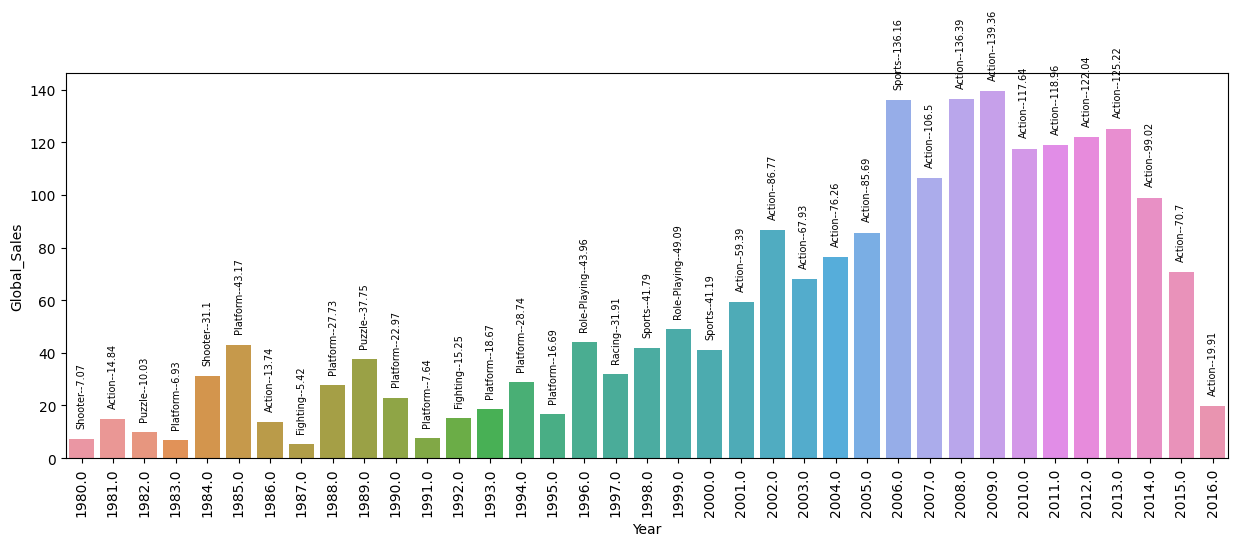

In [22]:
plt.figure(figsize=(15,5))
ax1 = sns.barplot(x = 'Year', y = 'Global_Sales', data = year_max_sale)
index = 0
for value in year_max_sale['Global_Sales'].values:
    ax1.text(index, value+5, str(year_max_sale['Genre'].iloc[index] + '--' + str(round(value,2))), color = '#000', size = 7, rotation = 90, ha = 'center')
    index += 1

plt.xticks(rotation = 90)
#plt.grid()
plt.show()

In [23]:
## Most sales in a calendar year for different genres are highest in 2009 for Action genre with 139.36 million followed by 2008 with 136.39 million in the same action genre
## Action games constitute most number of games developed and also most sales in the 2000s decade.

In [24]:
vg_genre = vg.groupby(['Genre'])['Global_Sales'].sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
vg_genre

,Genre,Global_Sales
0,Action,1722.87
10,Sports,1309.24
8,Shooter,1026.20
7,Role-Playing,923.80
4,Platform,829.15
3,Misc,797.62
6,Racing,726.77
2,Fighting,444.05
9,Simulation,389.87
5,Puzzle,242.22


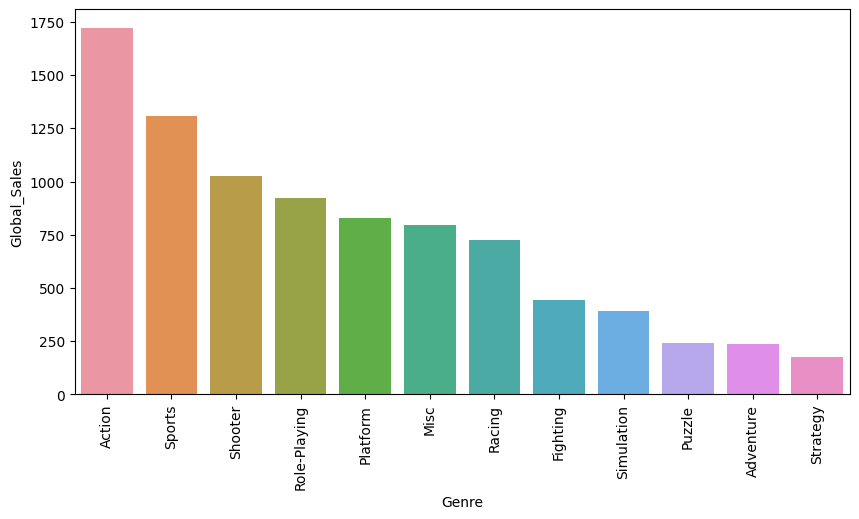

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(x='Genre', y='Global_Sales', data = vg_genre)
plt.xticks(rotation=90)
plt.show()

In [26]:
## Action, Sports and Shooter games are the genres with most sales with more than one billion in sales.

In [27]:
vg_platform = vg.groupby(['Platform'])['Global_Sales'].sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
vg_platform

,Platform,Global_Sales
16,PS2,1233.46
28,X360,969.61
17,PS3,949.35
26,Wii,909.81
4,DS,818.67
15,PS,727.39
6,GBA,313.56
19,PSP,291.71
18,PS4,278.07
13,PC,255.05


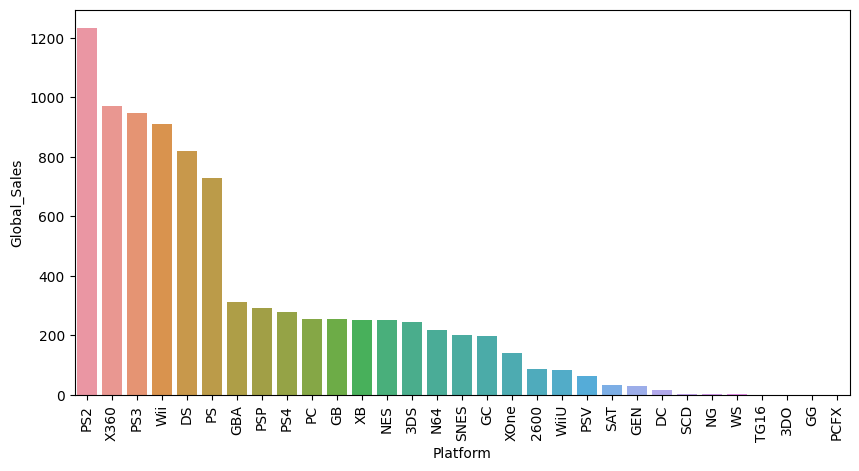

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(x='Platform', y='Global_Sales', data = vg_platform)
plt.xticks(rotation=90)
plt.show()

In [29]:
## The games released in PS2 platform have the most sales of more than one billion.

In [31]:
top_game_sale = vg[['Name','Year','Genre','Global_Sales']]
top_game_sale = top_game_sale.sort_values(['Global_Sales'], ascending = False).head(20)
top_game_sale

,Name,Year,Genre,Global_Sales
0,Wii Sports,2006.0,Sports,82.74
1,Super Mario Bros.,1985.0,Platform,40.24
2,Mario Kart Wii,2008.0,Racing,35.82
3,Wii Sports Resort,2009.0,Sports,33.00
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,31.37
5,Tetris,1989.0,Puzzle,30.26
6,New Super Mario Bros.,2006.0,Platform,30.01
7,Wii Play,2006.0,Misc,29.02
8,New Super Mario Bros. Wii,2009.0,Platform,28.62
9,Duck Hunt,1984.0,Shooter,28.31


In [33]:
name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0,20)

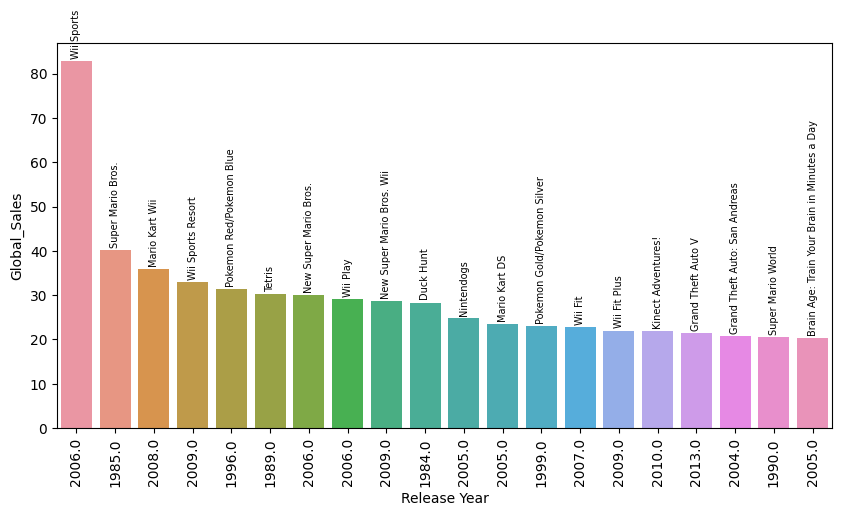

In [38]:
plt.figure(figsize=(10,5))
ax2 = sns.barplot(x = 'Name', y = 'Global_Sales', data = top_game_sale)
index = 0
for value in top_game_sale['Global_Sales']:
    ax2.text(index, value+1, name[index], color = '#000', size = 7, rotation = 90, ha = 'center')
    index += 1
plt.xticks(y, top_game_sale['Year'], fontsize = 10, rotation = 90)
plt.xlabel('Release Year')
plt.show()

In [39]:
## Wii sports has the most sales of 82.74 million in the year 2006.

In [50]:
genre_comparison = vg[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].reset_index(drop=True)
# genre_comparison
genre_comparison_map = genre_comparison.groupby(['Genre']).sum()
genre_comparison_map

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,861.80,516.48,158.65,184.92
Adventure,102.06,63.79,52.01,16.70
Fighting,220.74,100.00,87.15,36.19
Misc,402.48,213.82,106.67,74.02
Platform,445.99,200.67,130.65,51.51
Puzzle,122.01,50.53,56.68,12.47
Racing,356.93,236.32,56.61,76.68
Role-Playing,326.50,187.58,350.25,59.38
Shooter,575.16,310.45,38.18,101.90


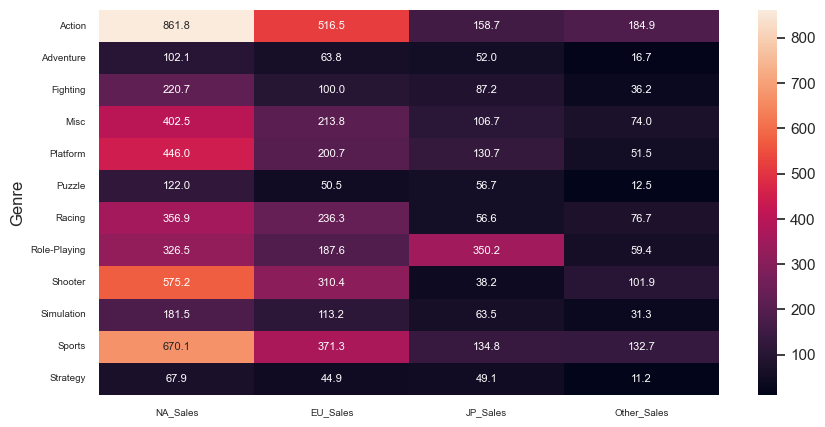

In [82]:
plt.figure(figsize=(10,5))
sns.set(font_scale = 1)
sns.heatmap(data = genre_comparison_map, annot = True, annot_kws={'size':8}, fmt = '.1f')
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 7)
plt.show()

In [ ]:
## Most sales are in Action genre for All regions except Japan. In Japan, Role-Playing genre has more sales than the other regions.

In [69]:
genre_comparison_table = genre_comparison_map.reset_index()
genre_comparison_table = pd.melt(genre_comparison_table,id_vars = ['Genre'], value_vars = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], var_name = 'Sale_Region', value_name = 'Sale_Price')
genre_comparison_table.head()

,Genre,Sale_Region,Sale_Price
0,Action,NA_Sales,861.80
1,Adventure,NA_Sales,102.06
2,Fighting,NA_Sales,220.74
3,Misc,NA_Sales,402.48
4,Platform,NA_Sales,445.99


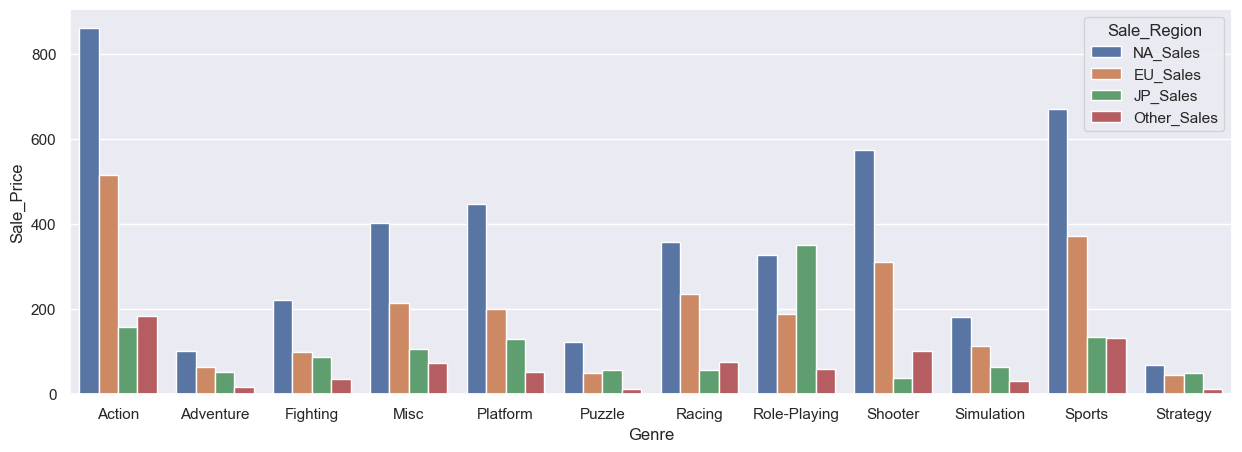

In [72]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Genre', y = 'Sale_Price', hue = 'Sale_Region', data = genre_comparison_table)
plt.show()

In [73]:
## North American sales are highest in all the genres. Action, Sports and Shooter games have higher sales compared to other genres.

In [83]:
## Sales comparison by platform

platform_comparison = vg[['Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
# platform_comparison.head()
platform_comparison_map = platform_comparison.groupby(['Platform']).sum()
platform_comparison_map

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
2600,80.78,4.86,0.00,0.84
3DO,0.00,0.00,0.10,0.00
3DS,78.03,58.30,97.30,12.55
DC,5.43,1.69,8.56,0.27
DS,388.29,194.07,175.02,60.27
GB,113.64,47.51,85.12,8.16
GBA,184.12,74.59,46.56,7.61
GC,131.94,38.32,21.34,5.13
GEN,19.27,5.52,2.67,0.89


In [85]:
# plt.figure(figsize=(10,5))
# sns.set(font_scale = 1)
# sns.heatmap(platform_comparison_map, annot = True, annot_kws={'size':8}, fmt = '.1f')
# plt.xticks(fontsize = 7)
# plt.yticks(fontsize = 7)
# plt.show()
platform_comparison_table = platform_comparison_map.reset_index()
platform_comparison_table = pd.melt(platform_comparison_table,id_vars = ['Platform'], value_vars = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], var_name = 'Sale_Region', value_name = 'Sale_Price')
platform_comparison_table.head()


,Platform,Sale_Region,Sale_Price
0,2600,NA_Sales,80.78
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,78.03
3,DC,NA_Sales,5.43
4,DS,NA_Sales,388.29


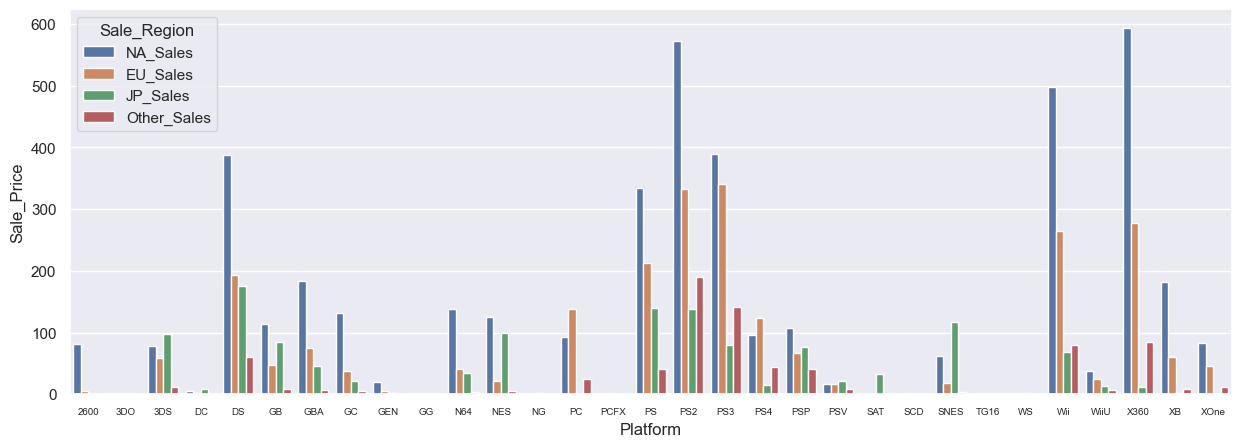

In [87]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Platform', y = 'Sale_Price', hue = 'Sale_Region', data = platform_comparison_table)
plt.xticks(fontsize = 7)
plt.show()

In [88]:
## X360, PS2, Wii platforms are with high sales.

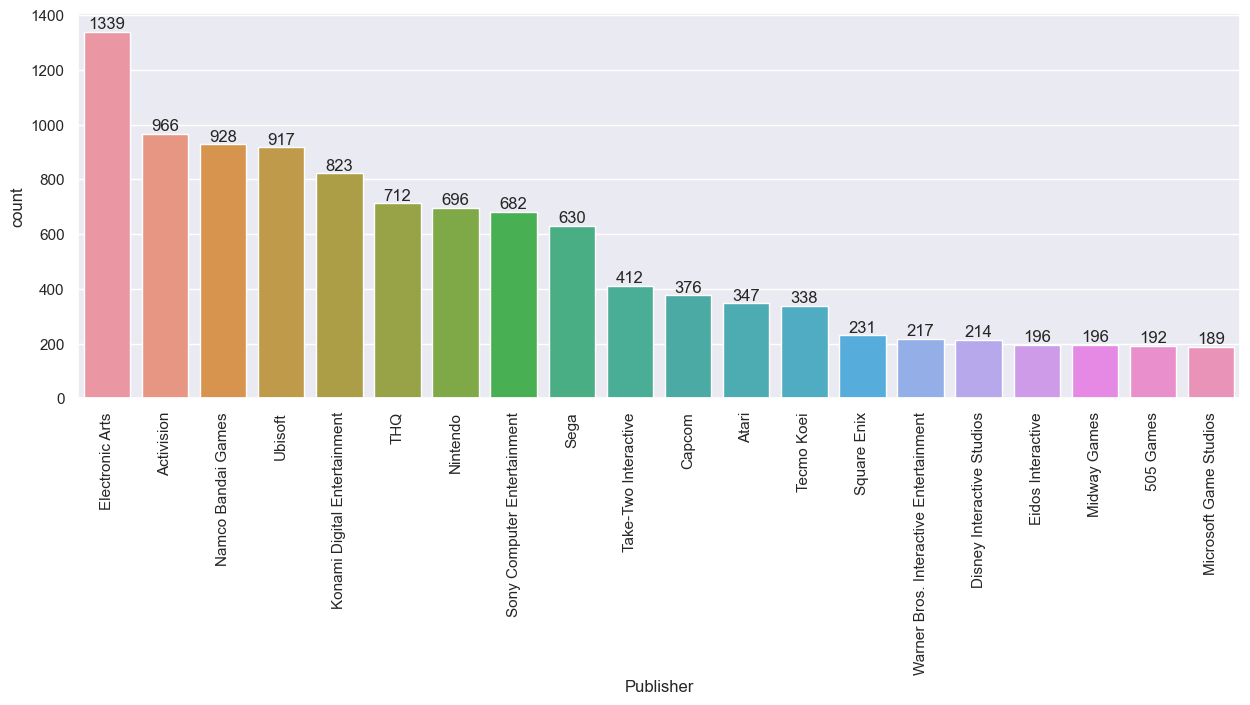

In [121]:
## Analysis by Publisher

plt.figure(figsize = (15,5))
ax3 = sns.countplot(x = 'Publisher', data = vg, order = vg.groupby(['Publisher'])['Name'].count().sort_values(ascending = False).iloc[:20].index)

for i in ax3.containers:
    ax3.bar_label(i)

plt.xticks(rotation = 90)
plt.show()

In [122]:
## Electronic Arts is the publisher with most number of games published between 1980 to 2016 with 1339 games followed by Activision with 966 games.

In [152]:
## Top publisher by count each year
top_publisher_df = vg.groupby(['Year','Publisher']).size().reset_index(name='count')
# top_publisher_df
top_publisher_idx = top_publisher_df.groupby(['Year'])['count'].transform(max) == top_publisher_df['count']
# top_publisher_idx
top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop = True)
# top_publisher_count

In [154]:
top_publisher_count['Publisher'] = top_publisher_count.groupby(by = ['Year'])['Publisher'].transform(lambda x: ','.join(x))
top_publisher_count.drop_duplicates(inplace=True)
# top_publisher_count

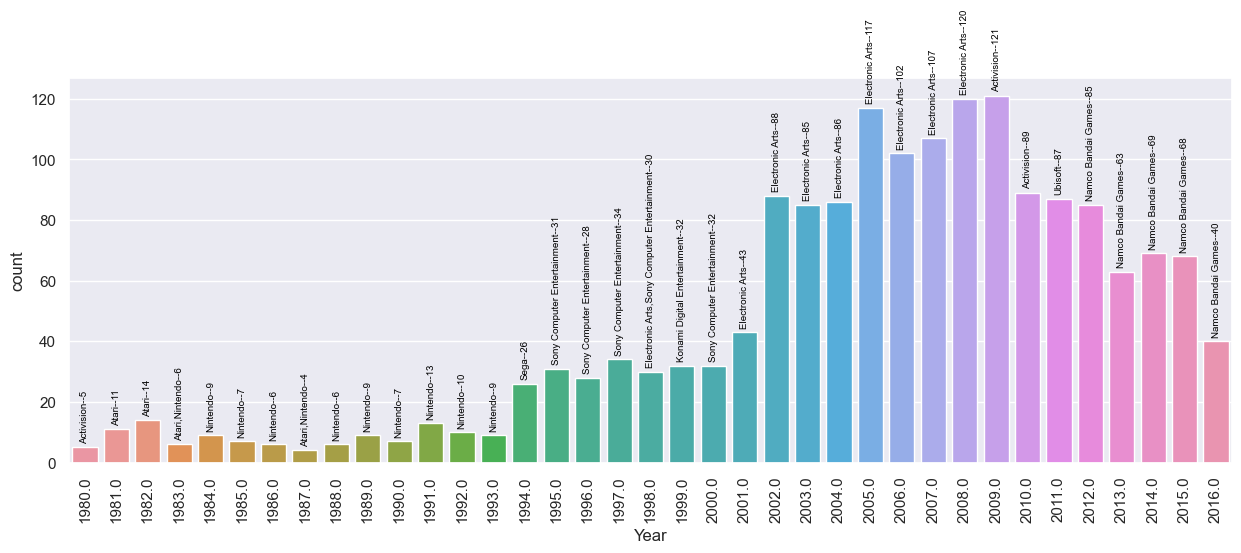

In [157]:
plt.figure(figsize=(15,5))
ax4 = sns.barplot(x = 'Year', y = 'count', data = top_publisher_count)
index = 0
for value in top_publisher_count['count'].values:
    ax4.text(index, value+2, str(top_publisher_count['Publisher'].iloc[index] + '--' + str(value)), color = '#000', size = 7, rotation = 90, ha = 'center')
    index += 1

plt.xticks(rotation = 90)
#plt.grid()
plt.show()

In [ ]:
## Electronic arts has released the most number of games (120) in 2008. From 2001 to 2008, the most popular publisher is Electronic Arts.

In [126]:
## Sales by Publisher

publisher_sales = vg[['Publisher','Global_Sales']]
publisher_sales = publisher_sales.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending = False).reset_index().head(20)
publisher_sales

,Publisher,Global_Sales
0,Nintendo,1784.43
1,Electronic Arts,1093.39
2,Activision,721.41
3,Sony Computer Entertainment,607.28
4,Ubisoft,473.25
5,Take-Two Interactive,399.30
6,THQ,340.44
7,Konami Digital Entertainment,278.56
8,Sega,270.66
9,Namco Bandai Games,253.65


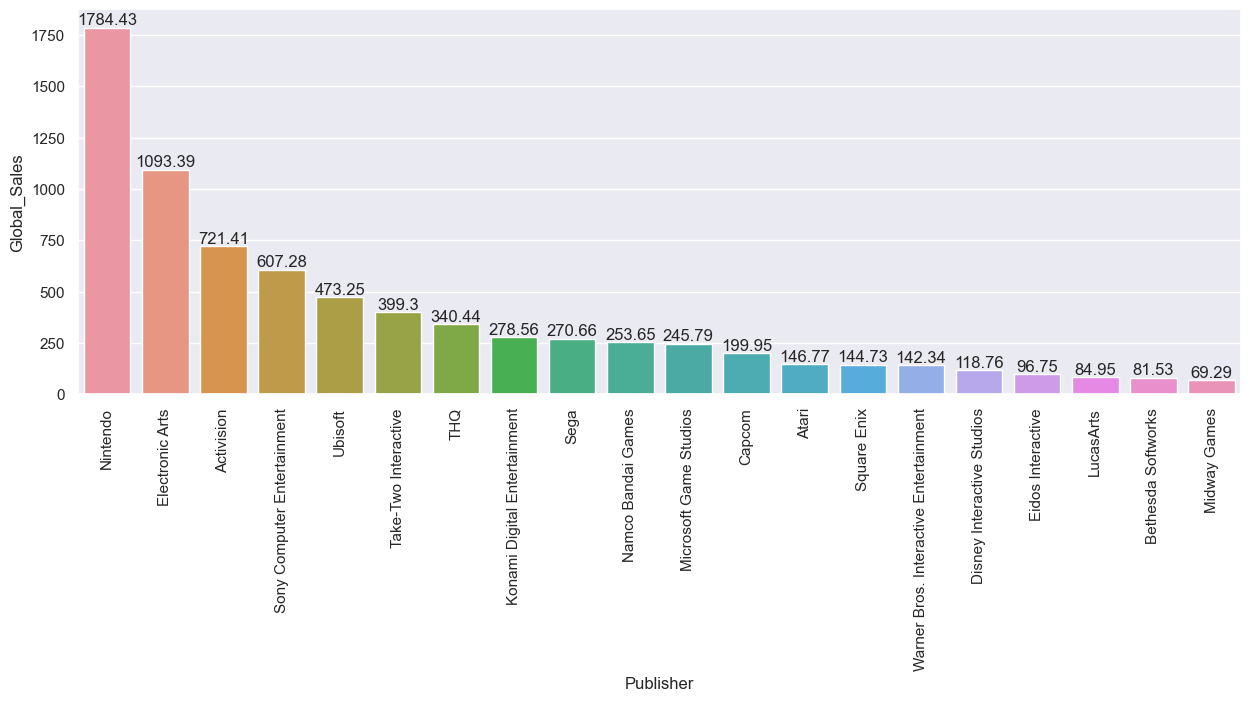

In [155]:
plt.figure(figsize = (15,5))
ax5 = sns.barplot(x = 'Publisher', y = 'Global_Sales',data = publisher_sales)

for i in ax5.containers:
    ax5.bar_label(i)

plt.xticks(rotation = 90)
plt.show()

In [128]:
## Nintendo leads the global sales with 1784.43 million. 
## The total games released by Nintendo are approximately half of those released by Electronic arts. However, the global sales of Nintendo are approximately 60% more than Electronic arts.

In [137]:
## Publisher Comparison

publisher_comparison = vg[['Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
# publisher_comparison.head()
publisher_comparison = publisher_comparison.groupby(['Publisher']).sum().reset_index().sort_values(['Global_Sales'], ascending = False).head(20)
# publisher_comparison
publisher_comparison = pd.melt(publisher_comparison, id_vars = ['Publisher'], value_vars = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], var_name = 'Sale_Region', value_name = 'Sale_Price')
publisher_comparison

,Publisher,Sale_Region,Sale_Price
0,Nintendo,NA_Sales,815.75
1,Electronic Arts,NA_Sales,584.22
2,Activision,NA_Sales,426.01
3,Sony Computer Entertainment,NA_Sales,265.22
4,Ubisoft,NA_Sales,252.54
...,...,...,...
75,Disney Interactive Studios,Other_Sales,13.15
76,Eidos Interactive,Other_Sales,7.90
77,LucasArts,Other_Sales,10.28
78,Bethesda Softworks,Other_Sales,10.10


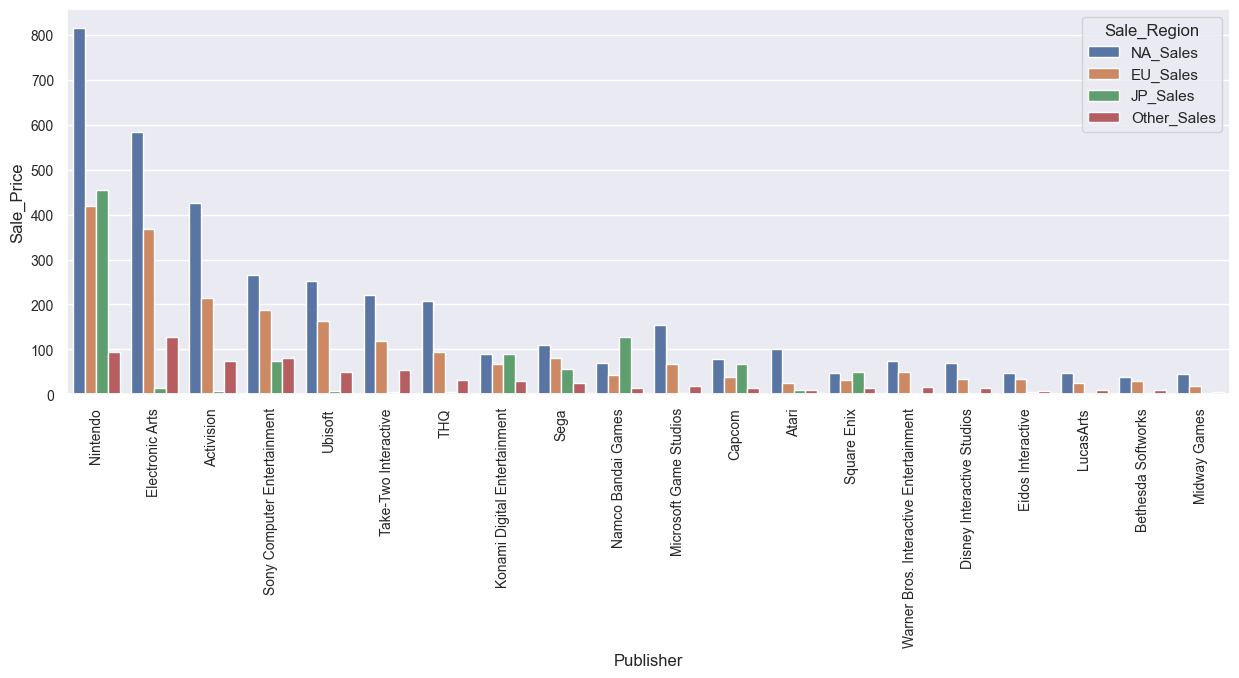

In [144]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Publisher', y = 'Sale_Price', hue = 'Sale_Region', data = publisher_comparison)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [145]:
## North American, European and Japan sales are all dominated by Nintendo. Electronic Arts dominated in the other regions.

In [162]:
## Total revenue by Region

top_sale_region = vg[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
top_sale_region = top_sale_region.sum().reset_index().rename(columns={'index':'Region',0:'total_sales'})
top_sale_region

,Region,total_sales
0,NA_Sales,4333.16
1,EU_Sales,2409.12
2,JP_Sales,1284.25
3,Other_Sales,788.99


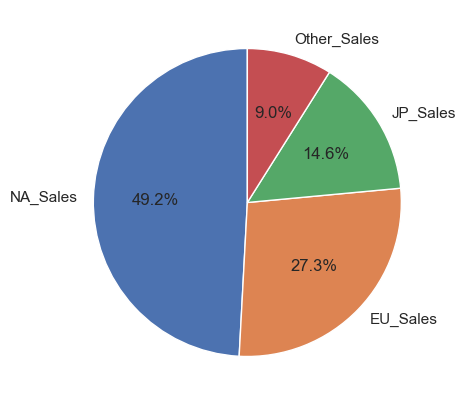

In [171]:
plt.figure(figsize = (10,5))
plt.pie(top_sale_region['total_sales'], labels = top_sale_region['Region'], startangle = 90, autopct='%1.1f%%')
plt.show()

In [ ]:
## North America has almost 50% of the total sales.